In [22]:
import numpy as np
import math
import plotly.offline as offline
from plotly.graph_objs import *

import math
from copy import deepcopy

EPS = 0.001

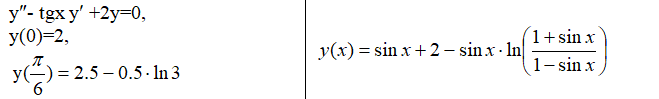

Функция трех переменных с заменой  
*z = y'*

In [23]:
def fxyz(x, y, z):
  return math.tan(x) * z - 2 * y

Точное решение

In [24]:
def y_exact(x):
  return math.sin(x) + 2 - math.sin(x) * math.log((1 + math.sin(x)) / (1 - math.sin(x)))

Список всех величин х

In [25]:
def x_list(a, b, h):
    return list(np.arange(a, b, h))

Точное решение

In [ ]:
h = 0.01
a = 0
b = math.pi / 6

x_exact = x_list(a, b, h)
res_exact = [y_exact(i) for i in x_exact]
res_exact

In [26]:
# начальные условия
h = 0.01

a = 0
b = math.pi / 6

y_left = 2
y_right = 2.5 - 0.5 * math.log(3)

x = x_list(a, b, h)

-------

**Погрешность методом Рунге – Ромберга**

In [27]:
def runge_romberg(y_l, y_r, p):
    return (sum((y_l[i] - y_r[i]) ** 2 for i in range(len(y_r))) ** 0.5) / (2 ** p - 1)

-----------

**Метод Стрельбы**

Метод Рунге-Кутты 4-го порядка

In [8]:
def runge_kutta(x, y0, z0, h):
    y = [y0]
    z = [z0]
    for k in range(len(x) - 1):
        K1 = h * z[k]
        L1 = h * fxyz(x[k], y[k], z[k])
        K2 = h * (z[k] + L1/2)
        L2 = h * fxyz(x[k] + h/2, y[k] + K1/2, z[k] + L1/2)
        K3 = h * (z[k] + L2/2)
        L3 = h * fxyz(x[k] + h/2, y[k] + K2/2, z[k] + L2/2)
        K4 = h * (z[k] + L3)
        L4 = h * fxyz(x[k] + h, y[k] + K3, z[k] + L3)

        delta = ((K1 + 2 * K2 + 2 * K3 + K4) / 6, (L1 + 2 * L2 + 2 * L3 + L4) / 6)
        
        y.append(y[k] + delta[0])
        z.append(z[k] + delta[1])
    return y

Метод для вычисления η

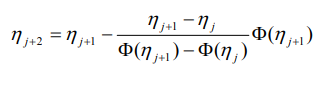

In [9]:
def Eta2_calc(PHI0, PHI1, Eta0, Eta1):                     # η - некоторое значение тангенса угла наклона касательной к решению в точке x = a
    return Eta1 - PHI1 * (Eta1 - Eta0) / (PHI1 - PHI0)

Метод стрельбы

In [10]:
def shooting(x, y0, y1, h):
    et_prev = 1
    et_i = 0.8
    
    y_prev = runge_kutta(x, y0, et_prev, h)  
    y_i = runge_kutta(x, y0, et_i, h)         # решаем задачу Коши с помощью метода Рунге-Кута 

    PHI_prev = y_prev[-1] - y1   
    PHI_i = y_i[-1] - y1
    
    while abs(PHI_i) > EPS:                   # изменяем значение только на левом конце отрезка
        et_prev, et_i = et_i, Eta2_calc(PHI_prev, PHI_i, et_prev, et_i)
        y_prev = y_i
        y_i = runge_kutta(x, y0, et_i, h)     # решаем задачу Коши для каждого нового η
        PHI_prev = PHI_i
        PHI_i = y_i[-1] - y1
    return y_i

In [11]:
res_shooting = shooting(x, y_left, y_right, h)
res_shooting

[2,
 2.0097106189261402,
 2.0190202467960905,
 2.0279278926313147,
 2.03643256558209,
 2.044533274946423,
 2.052229030156689,
 2.0595188407338103,
 2.0664017162087256,
 2.072876666010858,
 2.078942699323228,
 2.0845988249038108,
 2.089844050872673,
 2.0946773844643696,
 2.0990978317450257,
 2.10310439729346,
 2.106696083845651,
 2.1098718919017783,
 2.1126308192949974,
 2.1149718607210577,
 2.1168940072277684,
 2.118396245663273,
 2.1194775580819885,
 2.120136921107002,
 2.120373305247612,
 2.1201856741706293,
 2.119572983923939,
 2.118534182110735,
 2.1170682070127294,
 2.115173986660528,
 2.1128504378492368,
 2.1100964650972522,
 2.106910959546045,
 2.1032927977986104,
 2.09924084069411,
 2.0947539320160655,
 2.089830897131311,
 2.084470541556714,
 2.0786716494504973,
 2.0724329820247864,
 2.0657532758757955,
 2.058631241227827,
 2.0510655600870242,
 2.0430548843005396,
 2.0345978335165187,
 2.0256929930399807,
 2.016338911579368,
 2.006534098878185,
 1.996277023225777,
 1.9855661088

Погрешность методом Рунге – Ромберга для Метода Стрельбы 

In [12]:
p = 4

x_ = x_list(a, b, h / 2)
res_shooting2 = shooting(x, y_left, y_right, h / 2)
runge_romberg(res_shooting, res_shooting2, p)

0.038527944832162715

----------

**Конечно-разностный метод**

Разложим функцию  
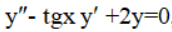

y'' + p(x_k) * y' + q(x_k) * y = f(x_k)

In [13]:
def pf(x):
  return -math.tan(x)

In [14]:
def qf(x):
  return 2

In [15]:
def ff(x):
  return 0

Решение уравнения трехдиагональной матрицы

In [16]:
def tma(a, b, c, d, shape):
    p = [-c[0] / b[0]]
    q = [d[0] / b[0]]
    x = [0] * (shape + 1)
    for i in range(1, shape):
        p.append(-c[i] / (b[i] + a[i] * p[i - 1]))
        q.append((d[i] - a[i] * q[i - 1]) / (b[i] + a[i] * p[i - 1]))
    for i in reversed(range(shape)):
        x[i] = p[i] * x[i + 1] + q[i]
    return x[:-1]

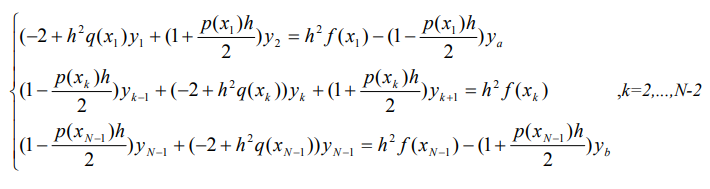

In [29]:
def finite_difference_method(a, b, y0, y1, h):
    n = int((b - a) / h)
    x = [i for i in np.arange(a, b + h, h)]                                     # записываем уравнения для системы 
    A = [0] + [1 - pf(x[i]) * h / 2 for i in range(0, n - 1)] + [0]
    B = [h] + [qf(x[i]) * h ** 2 - 2 for i in range(0, n - 1)] + [h]
    C = [0] + [1 + pf(x[i]) * h / 2 for i in range(0, n - 1)] + [0]
    D = [y0 * h] + [ff(x[i]) * h ** 2 for i in range(0, n - 1)] + [y1 * h]      # список решений

    y = tma(A, B, C, D, len(A))
    return x, y

In [30]:
a = 0
b = math.pi / 6
y0 = 2
yn = 2.5 - 0.5 * math.log(3)
h = 0.01

x_, res_difference = finite_difference_method(a, b, y0, yn, h)
res_difference

[2.0,
 2.0097169024574555,
 2.01903186153442,
 2.0279439256206144,
 2.036452143182158,
 2.0445555628084358,
 2.05225323322669,
 2.0595442032841773,
 2.0664275218977117,
 2.072902237970347,
 2.078967400274901,
 2.084622057303968,
 2.0898652570860228,
 2.0946960469671354,
 2.099113473357797,
 2.103116581444256,
 2.106704414863735,
 2.109876015342823,
 2.112630422298262,
 2.114966672399307,
 2.1168837990907305,
 2.1183808320755078,
 2.1194567967561104,
 2.12011071363328,
 2.120341597661056,
 2.1201484575567453,
 2.1195302950644415,
 2.1184861041705876,
 2.1170148702699896,
 2.115115569280572,
 2.1127871667050573,
 2.1100286166376354,
 2.1068388607135518,
 2.103216826999426,
 2.09916142882196,
 2.094671563532545,
 2.089746111205126,
 2.0843839332645047,
 2.0785838710420905,
 2.0723447442559046,
 2.06566534941146,
 2.058544458119899,
 2.0509808153295634,
 2.042973137466899,
 2.0345201104823554,
 2.0256203877966446,
 2.016272588142431,
 2.006475293296189,
 1.9962270456946274,
 1.985526345929


Погрешность методом Рунге – Ромберга для Конечно-разностного метода

In [31]:
p = 4

x_2, res_difference2 = finite_difference_method(a, b, y0, yn, h / 2)
runge_romberg(res_difference, res_difference2[:len(res_difference)], p)

0.02959638261855139

----

Графики

In [32]:
scatter_exact = Scatter(x = x, y = res_exact, name = 'Exact solution', mode = 'markers + lines', showlegend = True)
scatter_shooting = Scatter(x = x, y = res_shooting, name = 'Shooting method', mode = 'markers + lines', showlegend = True)
scatter_difference = Scatter(x = x, y = res_difference, name = 'Finite difference method', mode = 'markers + lines', showlegend = True)
data = [scatter_exact, scatter_shooting, scatter_difference]
layout = Layout(title = 'Решения краевой задачи для ОДУ', xaxis = dict(title = 'x'), yaxis = dict(title = 'y'))

fig = Figure(data = data, layout = layout)
offline.iplot(fig)